#                                        PREDICTING STOCK PRICE




# https://arxiv.org/pdf/1805.11317v1.pdf

# Based on the article above i tried the methods used in the article for chinese stocks to predict the prices of american stocks. I tried to follow the concept of the article:  

# 1) 3 different stocks with ajusted wekkly closeing price data for 427 preiods each

# 2) Each stock has different volatility (price range) : GOOGL (from 500.72 to 1518.73), Nokia (1.36 to 7.32), MSFT (22.3 to 184.26) like in In the original article (3 chinese stocks also have different volatility - i tried to represent this).

# 3) 3 previous periods used to predict the price for the next period.


# P.S. Even the original paper spposed to have a code - i was not able to find one (the attached code was wrong). More sad, i was not even abele to find the original stock data.


In [2]:
from alpha_vantage.timeseries import TimeSeries
import matplotlib.pyplot as plt

In [3]:
ts = TimeSeries(key='KSUCO60TUQ9O2W8P', output_format='pandas')
data1, meta_data1 = ts.get_weekly_adjusted(symbol='MSFT')

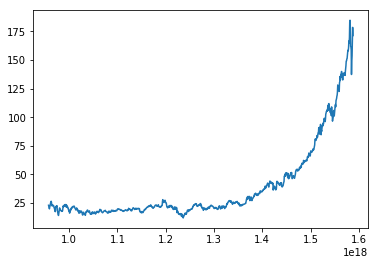

maximum 184.8466
minimum 22.3843


In [4]:
#Microsoft stock weekly prices. Ticker='MSFT'

#Leaving just ajusted weekly closed prices 
Microsoft_weekly_cl=data1['5. adjusted close']

#Just first 143 rows as in the article
Microsoft_weekly_cl_427=Microsoft_weekly_cl.iloc[0:427]
Microsoft_weekly_cl
plt.plot(Microsoft_weekly_cl)
max_MSFT=Microsoft_weekly_cl_427.max
min_MSFT=Microsoft_weekly_cl_427.min
plt.show()
print("maximum", max_MSFT(0))
print("minimum", min_MSFT(0))


In [5]:
#Nokia stock, ticker="NOK"
data2, meta_data2 = ts.get_weekly_adjusted(symbol='NOK')

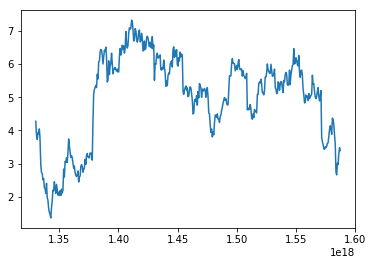

maximum 7.3221
minimum 1.3612


In [6]:
Nokia_weekly_cl=data2['5. adjusted close']
Nokia_weekly_cl_427=Nokia_weekly_cl[0:427]
Nokia_weekly_cl_427
plt.plot(Nokia_weekly_cl_427)
max_NOK=Nokia_weekly_cl_427.max
min_NOK=Nokia_weekly_cl_427.min
plt.show()
print("maximum", max_NOK(0))
print("minimum", min_NOK(0))


In [7]:
# Alphabet Inc. (GOOGL)
data3, meta_data3 = ts.get_weekly_adjusted(symbol='GOOGL')
data3



,1. open,2. high,3. low,4. close,5. adjusted close,6. volume,7. dividend amount
date,,,,,,,
2020-04-23,1269.89,1288.15,1205.00,1271.17,1271.1700,8254590.0,0.0
2020-04-17,1201.50,1290.00,1182.33,1279.00,1279.0000,12662413.0,0.0
2020-04-09,1133.00,1221.99,1125.00,1206.57,1206.5700,10965082.0,0.0
2020-04-03,1132.64,1173.40,1075.08,1092.70,1092.7000,14188545.0,0.0
2020-03-27,1056.37,1171.48,1008.87,1110.26,1110.2600,19297309.0,0.0
...,...,...,...,...,...,...,...
2004-09-24,116.95,124.10,116.77,119.83,60.1005,43097600.0,0.0
2004-09-17,106.63,117.49,106.46,117.49,58.9269,48124800.0,0.0
2004-09-10,101.01,106.56,99.61,105.33,52.8281,23593600.0,0.0


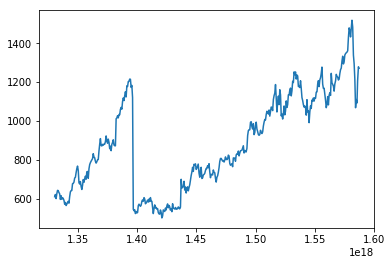

maximum 1518.73
minimum 500.72


In [8]:
#Alphabet  Inc. (Google).
GOOGL_weekly_cl=data3['4. close']
GOOGL_weekly_cl_427=GOOGL_weekly_cl.iloc[0:427]
plt.plot(GOOGL_weekly_cl_427)
plt.show()
max_GOOGL=GOOGL_weekly_cl_427.max
min_GOOGL=GOOGL_weekly_cl_427.min
print("maximum", max_GOOGL(0))
print("minimum", min_GOOGL(0))


In [9]:
#Since I was not able to get the data used in the article i got the american stocks data.
#However i represented the main principle of the dataset represented in the article:
#1) 3 different stocks with ajusted wekkly closeing price data for 427 preiods each
#2) Each stock has different volatility: GOOGL (from 500.72 to 1518.73), Nokia (1.36 to 7.32), MSFT (22.3 to 184.26) 
#3) 3 previous periods used to predict the price for the next period.

In [10]:
#Importing additional libraries necessary for future work
import math
import sklearn
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler


#IMPORTANT!!! 
#sklearn does not automatically import its subpackages. If you only imported via: import sklearn, then it wont work. 
# Import with import sklearn.cross_validation instead.

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: F

In [11]:
#Creating new x and y. Remeber that for this article authors used 3 prices of the previuos period (X) 
# to predict the price of the period (Y). So, Y actually depends on the prices of 3 previous periods

Microsoft_weekly_cl_427

date
2020-04-23    171.4200
2020-04-17    178.6000
2020-04-09    165.1400
2020-04-03    153.8300
2020-03-27    149.7000
                ...   
2012-03-23     26.5039
2012-03-16     26.9924
2012-03-09     26.4873
2012-03-02     26.5577
2012-02-24     26.0651
Name: 5. adjusted close, Length: 427, dtype: float64

In [12]:
#https://datascience.stackexchange.com/questions/46332/sklearn-preprocessing-minmaxscaler
#https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5   
#https://github.com/voq7/Stock-Price-Prediction/blob/master/Predicting%2Bstock%2Bprice%2BLSTM%2Bvs%2BLinear%2BModel.ipynb

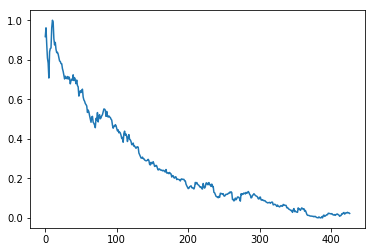

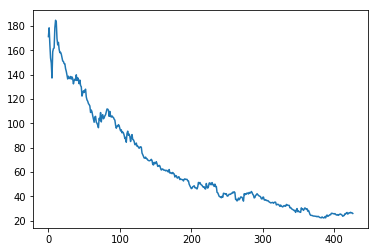

In [13]:
# Canging data to numpry array
MICROSOFT=Microsoft_weekly_cl_427.values
#Scaling the data
scaler=MinMaxScaler(feature_range=(0,1))
MICROSOFT=MICROSOFT.reshape(-1,1)
#Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1)
#if it contains a single sample
MICROSOFT_SCALED=scaler.fit_transform(MICROSOFT)
MICROSOFT_SCALED

Microsoft_back=scaler.inverse_transform(MICROSOFT_SCALED)
Microsoft_back

plt.plot(MICROSOFT_SCALED)
plt.show()
plt.plot(MICROSOFT)
plt.show()

In [14]:
####
### Here are 3 cells for MICROSOFT DATA SET_UP
###


# NOW I AM CREATING X and Y Dataset for a Microsoft stock

len(MICROSOFT_SCALED)
train_set_lenghth=round(0.8*len(MICROSOFT_SCALED))
test_set_lenghth=len(MICROSOFT_SCALED)-train_set_lenghth
test_set_lenghth
train_set_lenghth
training_set_Microsoft, test_set_Microsoft = MICROSOFT_SCALED[test_set_lenghth:train_set_lenghth,:], MICROSOFT_SCALED[:train_set_lenghth,:]

In [15]:
# Split data into train X and Train Y
#As we remeber in this article 3 previous periods prices are used 
#to predect the price in the current period

y_M_train=[]
x_M_train=[]

for i in range (3, len(training_set_Microsoft)):
    x_M_train.append(training_set_Microsoft[i-3:i,0])
    y_M_train.append(training_set_Microsoft[i,0])
    if i<=3:
        print(x_M_train)
        print(y_M_train)

# Checking 
# Also this sets are used for training a full model
y_M_train_np=np.array(y_M_train)       
y_M_train_back=scaler.inverse_transform(y_M_train_np.reshape(-1,1))
y_M_train_back

x_M_train_np=np.array(x_M_train)       
x_M_train_back=scaler.inverse_transform(x_M_train_np.reshape(-1,1))
x_M_train_back

#Now I am doing the same for the test set
y_M_test=[]
x_M_test=[]

for i in range (3, len(test_set_Microsoft)):
    x_M_test.append(test_set_Microsoft[i-3:i,0])
    y_M_test.append(test_set_Microsoft[i,0])
    if i<=3:
        print(x_M_test)
        print(y_M_test)

x_M_test_np=np.array(x_M_test)       
x_M_test_back=scaler.inverse_transform(x_M_test_np.reshape(-1,1))
x_M_test_back

y_M_test_np=np.array(y_M_test)       
y_M_test_back=scaler.inverse_transform(y_M_test_np.reshape(-1,1))
y_M_test_back



        

[array([0.51388538, 0.53869667, 0.51502964])]
[0.5100912642502292]
[array([0.9173556 , 0.96155046, 0.87870047])]
[0.8090843229475393]


array([[153.83  ],
       [149.7   ],
       [137.35  ],
       [158.83  ],
       [161.57  ],
       [162.01  ],
       [178.59  ],
       [184.8466],
       [183.3906],
       [169.7677],
       [164.5918],
       [166.6462],
       [160.9018],
       [158.1892],
       [158.5283],
       [156.9825],
       [154.1103],
       [151.3379],
       [150.9689],
       [149.1837],
       [149.0546],
       [145.0691],
       [142.8428],
       [139.871 ],
       [136.5713],
       [138.8274],
       [137.277 ],
       [136.8893],
       [138.5889],
       [136.4818],
       [138.251 ],
       [137.0186],
       [132.5758],
       [135.2991],
       [136.4012],
       [135.5989],
       [139.9967],
       [135.3215],
       [137.5798],
       [135.7573],
       [132.6868],
       [135.6682],
       [131.1911],
       [130.1511],
       [122.5045],
       [125.0402],
       [126.8528],
       [125.4637],
       [127.2105],
       [128.1876],
       [121.753 ],
       [119.3647],
       [118.

In [220]:
x_M_test[0],y_M_test[0]

(array([0.96155046, 0.87870047, 0.80908432]), 0.7836630405946486)

[array([0.6458924 , 0.6836887 , 0.68862085])]
[0.6310959754399503]
[array([0.34035129, 0.35544968, 0.3202201 ])]
[0.2698921303829959]


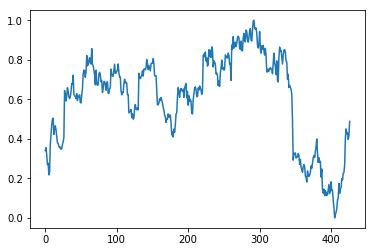

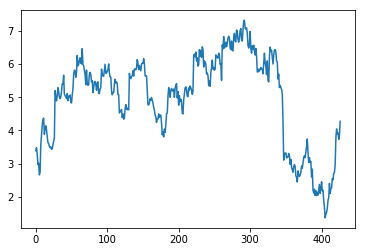

In [16]:
########
#. ..Here is the cell for Nokia Data set-up
########

# NOKIA (ALL THE PREPARATION FOR TRAIN AND TEST SPLIT)

# NOKIA SCALING

# Canging data to numpry array
NOKIA=Nokia_weekly_cl_427.values
#Scaling the data
scaler=MinMaxScaler(feature_range=(0,1))
NOKIA=NOKIA.reshape(-1,1)
#Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1)
#if it contains a single sample
NOKIA_SCALED=scaler.fit_transform(NOKIA)
NOKIA_SCALED


# NOW I AM CREATING X and Y Dataset for a NOKIA stock

len(NOKIA_SCALED)
train_set_N_lenghth=round(0.8*len(NOKIA_SCALED))
test_set_N_lenghth=len(NOKIA_SCALED)-train_set_N_lenghth
test_set_N_lenghth
train_set_N_lenghth


training_set_Nokia, test_set_Nokia = NOKIA_SCALED[test_set_N_lenghth:,:], NOKIA_SCALED[:train_set_N_lenghth,:]


# Split data into train X and Train Y
#As we remeber in this article 3 previous periods prices are used 
#to predect the price in the current period

y_N_train=[]
x_N_train=[]

for i in range (3, len(training_set_Nokia)):
    x_N_train.append(training_set_Nokia[i-3:i,0])
    y_N_train.append(training_set_Nokia[i,0])
    if i<=3:
        print(x_N_train)
        print(y_N_train)

        
#Now I am doing the same for the test set
y_N_test=[]
x_N_test=[]

for i in range (3, len(test_set_Nokia)):
    x_N_test.append(test_set_Nokia[i-3:i,0])
    y_N_test.append(test_set_Nokia[i,0])
    if i<=3:
        print(x_N_test)
        print(y_N_test)

y_N_test_np=np.array(y_N_test)
y_N_test_np=y_N_test_np.reshape(-1,1)
y_N_test_back=scaler.inverse_transform(y_N_test_np)
y_N_test_back


#For checking - everything works
x_N_test_np=np.array(x_N_test)
x_N_test_np=x_N_test_np.reshape(-1,1)
x_N_test_back=scaler.inverse_transform(x_N_test_np)
x_N_test_back


x_N_train_np=np.array(x_N_train)
x_N_train_np=x_N_train_np.reshape(-1,1)
x_N_train_back=scaler.inverse_transform(x_N_train_np)
x_N_train_back

y_N_train_np=np.array(y_N_train)
y_N_train_np=y_N_train_np.reshape(-1,1)
y_N_train_back=scaler.inverse_transform(y_N_train_np)
y_N_train_back


plt.plot(NOKIA_SCALED)
plt.show()
plt.plot(NOKIA)
plt.show()



[array([0.66489524, 0.71814619, 0.72300861])]
[0.7024783646526066]
[array([0.75681968, 0.76451115, 0.69336254])]
[0.5815070578874472]


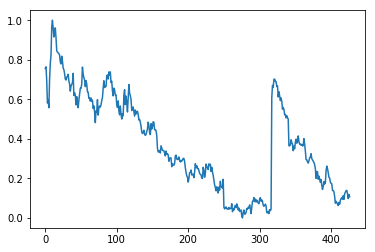

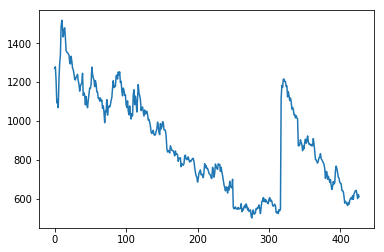

In [17]:
###
### SET UP FOR GOOGLE CELLS
#####

# # GOOGLE (ALL THE PREPARATION FOR TRAIN AND TEST SPLIT)

# GOOGLE SCALING

# Canging data to numpry array
GOOGLE=GOOGL_weekly_cl_427.values
#Scaling the data
scaler=MinMaxScaler(feature_range=(0,1))
GOOGLE=GOOGLE.reshape(-1,1)
#Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1)
#if it contains a single sample
GOOGLE_SCALED=scaler.fit_transform(GOOGLE)
GOOGLE_SCALED


# NOW I AM CREATING X and Y Dataset for a GOOGLE stock

len(GOOGLE_SCALED)
train_set_G_lenghth=round(0.8*len(GOOGLE_SCALED))
test_set_G_lenghth=len(GOOGLE_SCALED)-train_set_G_lenghth
test_set_G_lenghth
train_set_G_lenghth

training_set_Google, test_set_Google = GOOGLE_SCALED[test_set_G_lenghth:,:], GOOGLE_SCALED[:test_set_G_lenghth:,:]


# Split data into train X and Train Y
#As we remeber in this article 3 previous periods prices are used 
#to predect the price in the current period

y_G_train=[]
x_G_train=[]

for i in range (3, len(training_set_Google)):
    x_G_train.append(training_set_Google[i-3:i,0])
    y_G_train.append(training_set_Google[i,0])
    if i<=3:
        print(x_G_train)
        print(y_G_train)
        
        
#Now I am doing the same for the test set
y_G_test=[]
x_G_test=[]

for i in range (3, len(test_set_Google)):
    x_G_test.append(test_set_Google[i-3:i,0])
    y_G_test.append(test_set_Google[i,0])
    if i<=3:
        print(x_G_test)
        print(y_G_test)


       
y_G_test_back=np.array(y_G_test)
y_G_test_back=y_G_test_back.reshape(-1,1)
y_G_test_back=scaler.inverse_transform(y_G_test_back)
y_G_test_back

x_G_test_back=np.array(y_G_test)
x_G_test_back=x_G_test_back.reshape(-1,1)
x_G_test_back=scaler.inverse_transform(x_G_test_back)
x_G_test_back

y_G_train_back=np.array(y_G_train)
y_G_train_back=y_G_train_back.reshape(-1,1)
y_G_train_back=scaler.inverse_transform(y_G_train_back)
y_G_train_back

x_G_train_back=np.array(x_G_train)
x_G_train_back=x_G_train_back.reshape(-1,1)
x_G_train_back=scaler.inverse_transform(x_G_train_back)
x_G_train_back


plt.plot(GOOGLE_SCALED)
plt.show()
plt.plot(GOOGLE)
plt.show()



In [158]:
#SVM REGRESSION RESULTS FOR MICROSOFT
from sklearn import svm
clf_M = svm.SVR()
clf_M.fit(x_M_train, y_M_train)
predictions_M=clf_M.predict(x_M_test)
import sklearn.metrics as sk_m

predictions_M=scaler.inverse_transform(predictions_M.reshape(-1,1))

predictions_M

y_M_test_back

MSE_M=sk_m.mean_squared_error(predictions_M,y_M_test_back)

MAPE_M=np.mean(np.abs((y_M_test_back - predictions_M) / y_M_test_back)) * 100


MAPE_M


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


19.592351901867364

In [63]:
MSE_M

351.67127506120863

In [54]:
#SVM REGRESSION RESULTS FOR NOKIA

clf_N = svm.SVR()
clf_N.fit(x_N_train, y_N_train)

predictions_N=clf_N.predict(x_N_test)
import sklearn.metrics as sk_m

predictions_N=scaler.inverse_transform(predictions_N.reshape(-1,1))

predictions_N

#y_N_test_back=np.array(y_N_test)
#y_N_test_back=y_N_test_back.reshape(-1,1)
#y_N_test_back=scaler.inverse_transform(y_N_test_back)


MSE_N=np.mean((predictions_N-y_N_test_back)**2)

MAPE_N=np.mean(np.abs((y_N_test_back - predictions_N) / y_N_test_back)) * 100

MSE_N
MAPE_N

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


3.701700946388857

In [55]:
MSE_N

0.07169876742931135

In [165]:
#SVM REGRESSION RESULTS FOR GOOGLE
clf_G = svm.SVR()
clf_G.fit(x_G_train, y_G_train)
x_G_test=np.array(x_G_test)
predictions_G=clf_G.predict(x_G_test)
import sklearn.metrics as sk_m

predictions_G=scaler.inverse_transform(predictions_G.reshape(-1,1))

predictions_G

y_G_test_back=np.array(y_G_test)
y_G_test_back=y_G_test_back.reshape(-1,1)
y_G_test_back=scaler.inverse_transform(y_G_test_back)


MSE_G=sk_m.mean_squared_error(predictions_G,y_G_test_back)

MAPE_G=np.mean(np.abs((y_G_test_back - predictions_G) / y_G_test_back)) * 100


MAPE_G

x_G_test_back=np.array(x_G_test)
x_G_test_back=x_G_test_back.reshape(-1,1)
x_G_test_back=scaler.inverse_transform(x_G_test_back)
x_G_test_back
MAPE_G

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


4.93759368600819

In [166]:
MSE_G

7266.915802780673

In [191]:
#based on SVM regression i was not able to get the same results. However, i used the datasets
#separate. I did not combine them in one.  Now i will try to combine them in one still.

In [64]:
#Well, i was thinking to crate a GLOBAL TEST AND TRAIN SET, but i refused from such an idea
#Mainly becuase of the data structure:Y depends on the previous periods.
#So, i can not combine the whole dataset, becasue these periods shoould be 
#for the evry single stock, also I have train and test sets for each stock separetely.
# I could combine them, but when i scale them - it does not make sense
#I will try to describe it in more detail later
# So i refused from this idea

In [153]:
GLOBAL_TRAIN_SET_X=np.concatenate([x_G_train,x_M_train,x_N_train])
GLOBAL_TRAIN_SET_Y=np.concatenate([y_G_train,y_M_train,y_N_train])

In [99]:
##### So this cell seems to be irrelevant


GLOBAL_TRAIN_SET_X=np.concatenate([x_G_train,x_M_train,x_N_train])
GLOBAL_TRAIN_SET_Y=np.concatenate([y_G_train,y_M_train,y_N_train])

#SVM REGRESSION RESULTS FOR GLOBAL_TEST_SET
clf_GLOBAL = svm.SVR()
clf_GLOBAL.fit(GLOBAL_TRAIN_SET_X, GLOBAL_TRAIN_SET_Y)
predictions_GLOBAL_G=clf_GLOBAL.predict(np.array(x_G_test))
predictions_GLOBAL_G=scaler.inverse_transform(predictions_GLOBAL_G.reshape(-1,1))
predictions_GLOBAL_G

MAPE_G=np.mean(np.abs((y_G_test_back - predictions_GLOBAL_G) / y_G_test_back)) * 100
MAPE_G
MSE_G2=sk_m.mean_squared_error(predictions_GLOBAL_G,y_G_test_back)

predictions_GLOBAL_M=clf_GLOBAL.predict(np.array(x_M_test))
predictions_GLOBAL_M=scaler.inverse_transform(predictions_GLOBAL_M.reshape(-1,1))
predictions_GLOBAL_M

MAPE_M=np.mean(np.abs((y_M_test_back - predictions_GLOBAL_M) / y_M_test_back)) * 100
MAPE_M

MSE_M2=sk_m.mean_squared_error(predictions_GLOBAL_M,y_M_test_back)
#Still MAPE IS HIGH, SO I am not able to ge tge same results as in the article

predictions_GLOBAL_N=clf_GLOBAL.predict(np.array(x_N_test))
predictions_GLOBAL_N=scaler.inverse_transform(predictions_GLOBAL_N.reshape(-1,1))
predictions_GLOBAL_N
MSE_N2=sk_m.mean_squared_error(predictions_GLOBAL_N,y_N_test_back)


MAPE_N=np.mean(np.abs((y_N_test_back - predictions_GLOBAL_N) / y_N_test_back)) * 100
MAPE_N

MSE_N2

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.07064431472293041

In [146]:
MSE_G2

16892.82037659352

In [252]:
#SVM_LINEAR_KERNEL

In [109]:
#SVM REGRESSION RESULTS FOR MICROSOFT
from sklearn import svm
clf_M_LIN = svm.SVR(kernel="linear")
clf_M_LIN.fit(x_M_train, y_M_train)
x_M_test=np.array(x_M_test)
predictions_SVM_LIN=clf_M_LIN.predict(x_M_test)
import sklearn.metrics as sk_m

predictions_M_SVM_LIN=scaler.inverse_transform(predictions_SVM_LIN.reshape(-1,1))

predictions_M_SVM_LIN

y_M_test_back

MSE_M=sk_m.mean_squared_error(predictions_M_SVM_LIN,y_M_test_back)

MAPE_M=np.mean(np.abs((y_M_test_back - predictions_M_SVM_LIN) / y_M_test_back)) * 100

MAPE_M
MSE_M

263.316500447549

In [112]:
#SVM REGRESSION RESULTS FOR GOOGLE
clf_G = svm.SVR(kernel="linear")
clf_G.fit(x_G_train, y_G_train)
x_G_test=np.array(x_G_test)
predictions_G=clf_G.predict(x_G_test)
import sklearn.metrics as sk_m

predictions_G=scaler.inverse_transform(predictions_G.reshape(-1,1))

predictions_G

y_G_test_back=np.array(y_G_test)
y_G_test_back=y_G_test_back.reshape(-1,1)
y_G_test_back=scaler.inverse_transform(y_G_test_back)


MSE_G=sk_m.mean_squared_error(predictions_G,y_G_test_back)

MAPE_G=np.mean(np.abs((y_G_test_back - predictions_G) / y_G_test_back)) * 100

MAPE_G


5.131657920818878

In [117]:
#SVM REGRESSION RESULTS FOR NOKIA
from sklearn import svm
clf_N = svm.SVR(kernel='linear')
clf_N.fit(x_N_train, y_N_train)
x_N_test=np.array(x_N_test)
predictions_N=clf_N.predict(x_N_test)
import sklearn.metrics as sk_m

predictions_N=scaler.inverse_transform(predictions_N.reshape(-1,1))

predictions_N

#y_N_test_back=np.array(y_N_test)
#y_N_test_back=y_N_test_back.reshape(-1,1)
#y_N_test_back=scaler.inverse_transform(y_N_test_back)


MSE_N=sk_m.mean_squared_error(predictions_N,y_N_test_back)

MAPE_N=np.mean(np.abs((y_N_test_back - predictions_N) / y_N_test_back)) * 100

MSE_N

0.06937015279194272

In [297]:
###SIMPLE LINEAR REFRESSION

In [119]:
from sklearn.linear_model import LinearRegression

In [127]:
#make sure to run the cells for the dataset set-up for Microsoft here
reg_M_LIN = LinearRegression().fit(x_M_train, y_M_train)
prediction_M_LIN=reg_M_LIN.predict(x_M_test)
prediction_M_LIN=prediction_M_LIN.reshape(-1,1)
prediction_M_LIN=scaler.inverse_transform(prediction_M_LIN)
prediction_M_LIN
MSE_M_OLS=np.mean((prediction_M_LIN-y_M_test_back)**2)

MAPE_M_OLS=np.mean(np.abs((y_M_test_back - prediction_M_LIN) / y_M_test_back)) * 100

MAPE_M_OLS

MSE_M_OLS=sk_m.mean_squared_error(y_M_test_back, prediction_M_LIN)

MSE_M_OLS


7.525664064036067

In [143]:
#make sure to run the cells for the dataset set-up for Nokia here

reg_N_LIN = LinearRegression().fit(x_N_train, y_N_train)
prediction_N_LIN=reg_N_LIN.predict(x_N_test)
prediction_N_LIN=prediction_N_LIN.reshape(-1,1)
prediction_N_LIN=scaler.inverse_transform(prediction_N_LIN)
prediction_N_LIN
MSE_N_OLS=np.mean((prediction_N_LIN-y_N_test_back)**2)

MSE_N_OLS=sk_m.mean_squared_log_error(y_N_test_back,prediction_N_LIN)

MSE_N_OLS
MAPE_N_OLS=np.mean(np.abs((y_N_test_back - prediction_N_LIN) / y_N_test_back)) * 100
MAPE_N_OLS
MSE_N_OLS





27.295738038757992

In [145]:
#make sure to run the cells for the dataset set-up for Google here

reg_G_LIN = LinearRegression().fit(x_G_train, y_G_train)
prediction_G_LIN=reg_G_LIN.predict(x_G_test)
prediction_G_LIN=prediction_G_LIN.reshape(-1,1)
prediction_G_LIN=scaler.inverse_transform(prediction_G_LIN)
prediction_G_LIN
MSE_G_OLS=sk_m.mean_squared_error(prediction_G_LIN,y_G_test_back)

MAPE_G_OLS=np.mean(np.abs((y_G_test_back - prediction_G_LIN) / y_G_test_back)) * 100

MSE_G_OLS
MAPE_G_OLS


2.6815472099480533

In [18]:
# So generally the results are about the same as SVM. The level of accuracy 
#is pretty much the same for all the models

In [19]:
#NN (BACK PROPOGATION)

In [20]:
#Importing keras library and modules to 
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn import metrics as sk_m

In [21]:
# Neural network
from keras import optimizers
Adam=optimizers.Adam(lr=0.3)
model = Sequential()
model.add(Dense(3, input_dim=3,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='mean_absolute_percentage_error', optimizer=Adam, metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [60]:
np.array(x_G_train)

array([[0.71814619, 0.72300861, 0.70247836],
       [0.72300861, 0.70247836, 0.7384898 ],
       [0.70247836, 0.7384898 , 0.72439367],
       ...,
       [0.13936012, 0.12212061, 0.09776918],
       [0.12212061, 0.09776918, 0.11839766],
       [0.09776918, 0.11839766, 0.10724846]])

In [22]:
#training NN on microsoft data)
history = model.fit(np.array(x_M_train), y_M_train, epochs=1000)

Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
254/254 [==============================] - 0s 650us/step - loss: 145.5869 - acc: 0.0000e+00
Epoch 2/1000
254/254 [==============================] - 0s 43us/step - loss: 57.7955 - acc: 0.0000e+00
Epoch 3/1000
254/254 [==============================] - 0s 49us/step - loss: 41.8883 - acc: 0.0000e+00
Epoch 4/1000
254/254 [==============================] - 0s 50us/step - loss: 44.0281 - acc: 0.0000e+00
Epoch 5/1000
254/254 [==============================] - 0s 55us/step - loss: 42.1698 - acc: 0.0000e+00
Epoch 6/1000
254/254 [==============================] - 0s 50us/step - loss: 40.5758 - acc: 0.0000e+00
Epoch 7/1000
254/254 [==============================] - 0s 53us/step - loss: 39.1937 - acc: 0.0000e+00
Epoch 8/1000
254/254 [==============================] - 0s 50us/step - loss: 34.5561 - acc: 0.0000e+00
Epoch 9/1000
254/254 [==============================] - 0s 57us/step - loss: 20.7647 - acc: 0.0000e+00
Epoch 10/1000
254/254 [

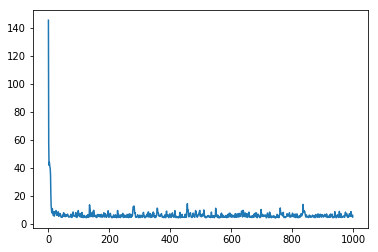

In [23]:
plt.plot(history.history['loss'])
plt.show()

In [147]:
predictions_G_BNN=model.predict(np.array(x_G_test))

MAPE_G_BNN=np.mean(np.abs((y_G_test - predictions_G_BNN) / y_G_test)) * 100

MSE_G_BNN=sk_m.mean_squared_error(y_G_test,predictions_G_BNN)

MAPE_G_BNN

predictions_N_BNN=model.predict(np.array(x_N_test))

MAPE_N_BNN=np.mean(np.abs((y_N_test - predictions_N_BNN) / y_N_test)) * 100

MAPE_N_BNN

predictions_M_BNN=model.predict(np.array(x_M_test))

MAPE_M_BNN=np.mean(np.abs((y_M_test - predictions_M_BNN) / y_M_test)) * 100

MAPE_N_BNN




31.87530954634376

[array([0.36132128, 0.35544968, 0.3202201 ]),
 array([0.35544968, 0.3202201 , 0.26989213]),
 array([0.3202201 , 0.26989213, 0.27660253]),
 array([0.26989213, 0.27660253, 0.21788656]),
 array([0.27660253, 0.21788656, 0.23130735]),
 array([0.21788656, 0.23130735, 0.37054807]),
 array([0.23130735, 0.37054807, 0.42087604]),
 array([0.37054807, 0.42087604, 0.46952641]),
 array([0.42087604, 0.46952641, 0.4980456 ]),
 array([0.46952641, 0.4980456 , 0.50475599]),
 array([0.4980456 , 0.50475599, 0.42255364]),
 array([0.50475599, 0.42255364, 0.45107282]),
 array([0.42255364, 0.45107282, 0.46617122]),
 array([0.45107282, 0.46617122, 0.44604003]),
 array([0.46617122, 0.44604003, 0.41081045]),
 array([0.44604003, 0.41081045, 0.38061367]),
 array([0.41081045, 0.38061367, 0.37725847]),
 array([0.38061367, 0.37725847, 0.36216008]),
 array([0.37725847, 0.36216008, 0.35544968]),
 array([0.36216008, 0.35544968, 0.35880488]),
 array([0.35544968, 0.35880488, 0.34706169]),
 array([0.35880488, 0.34706169, 0.

In [425]:
#So, as a result, i was able to reach only 110000 out of 1000000 epochs planned, but the
#Loss is still big MAPE=73.38

In [169]:
#GRNN NN
from neupy import algorithms
nw = algorithms.GRNN(std=20, verbose=False)
nw.train(x_N_train, y_N_train)


y_predicted_N_GRNN = nw.predict(x_N_test)
MAPE_N_GRNN=np.mean(np.abs((y_N_test - y_predicted_N_GRNN) / y_N_test)) * 100
MAPE_N_GRNN

26.22892023773729

In [194]:
nw2 = algorithms.GRNN(std=0.5, verbose=False)
nw2.train(x_M_train, y_M_train)


y_predicted_M_GRNN = nw2.predict(x_M_test)
MAPE_M_GRNN=np.mean(np.abs((y_M_test - y_predicted_M_GRNN) / y_M_test)) * 100
MAPE_M_GRNN

82.230526413713

In [185]:
nw2 = algorithms.GRNN(std=0.05, verbose=False)
nw2.train(x_G_train, y_G_train)


y_predicted_G_GRNN = nw2.predict(x_G_test)
MAPE_G_GRNN=np.mean(np.abs((y_G_test - y_predicted_G_GRNN) / y_G_test)) * 100
MAPE_G_GRNN

14.838092589770987

In [195]:
#rbf activation function NN

In [29]:
from keras.layers import Layer
from keras import backend as K

class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = K.cast_to_floatx(gamma)

    def build(self, input_shape):
        self.mu = self.add_weight(name='mu',
                                  shape=(int(input_shape[1]), self.units),
                                  initializer='uniform',
                                  trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        diff = K.expand_dims(inputs) - self.mu
        l2 = K.sum(K.pow(diff,2), axis=1)
        res = K.exp(-1 * self.gamma * l2)
        return res

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.units)

In [30]:
# RBF Neural network
from keras import optimizers
Adam=optimizers.Adam(lr=0.1)
modelRBF = Sequential()
modelRBF.add(Dense(3, input_dim=3,activation='sigmoid'))
modelRBF.add(RBFLayer(1,0.5))
modelRBF.compile(loss='mean_absolute_percentage_error', optimizer=Adam, metrics=['accuracy'])

In [31]:
history_RBF=modelRBF.fit(np.array(x_N_train),y_N_train,epochs=1000)

Epoch 1/1000
339/339 [==============================] - 0s 582us/step - loss: 2037030.7957 - acc: 0.0000e+00
Epoch 2/1000
339/339 [==============================] - 0s 40us/step - loss: 555625.7551 - acc: 0.0029
Epoch 3/1000
339/339 [==============================] - 0s 38us/step - loss: 134169.8562 - acc: 0.0029
Epoch 4/1000
339/339 [==============================] - 0s 38us/step - loss: 61594.1276 - acc: 0.0029
Epoch 5/1000
339/339 [==============================] - 0s 39us/step - loss: 39174.0534 - acc: 0.0029
Epoch 6/1000
339/339 [==============================] - 0s 40us/step - loss: 28969.3985 - acc: 0.0029
Epoch 7/1000
339/339 [==============================] - 0s 43us/step - loss: 21283.6122 - acc: 0.0029
Epoch 8/1000
339/339 [==============================] - 0s 40us/step - loss: 18735.7707 - acc: 0.0029
Epoch 9/1000
339/339 [==============================] - 0s 40us/step - loss: 14409.0246 - acc: 0.0029
Epoch 10/1000
339/339 [==============================] - 0s 40us/step - l

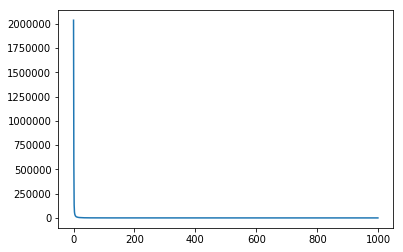

In [34]:
plt.plot(history_RBF.history['loss'])
plt.show()

In [228]:
predictions_G_RBF=modelRBF.predict(np.array(x_G_test))

MAPE_G_RBF=np.mean(np.abs((y_G_test - predictions_G_RBF) / y_G_test)) * 100

MSE_G_RBF=sk_m.mean_squared_error(y_G_test,predictions_G_RBF)

MAPE_G_RBF

predictions_N_RBF=modelRBF.predict(np.array(x_N_test))

MAPE_N_RBF=np.mean(np.abs((y_N_test - predictions_N_RBF) / y_N_test)) * 100

MAPE_N_RBF

predictions_M_RBF=modelRBF.predict(np.array(x_M_test))

MAPE_M_RBF=np.mean(np.abs((y_M_test - predictions_M_BNN) / y_M_test)) * 100

MAPE_N_RBF

99.99999999999983

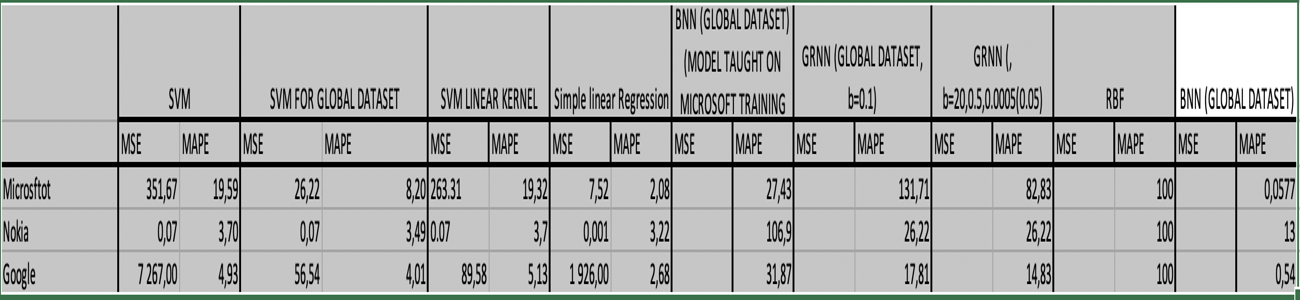

In [32]:
##CONCLUSION PART

import matplotlib.pyplot as plt
from PIL import Image,ImageFilter,ImageDraw,ImageFont
f=Image.open('/Users/vladimirant/Desktop/Снимок экрана 2020-05-18 в 20.58.08.png')
f=f.resize((1300,300))
f

# CONCLUSION

# Main Results

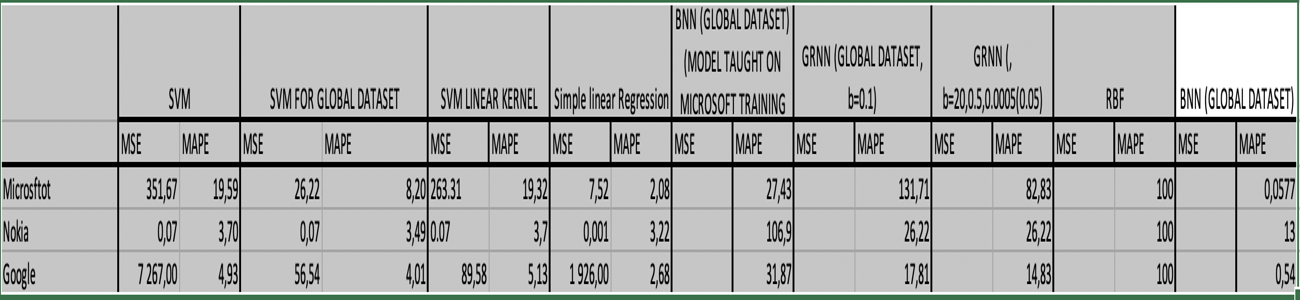

In [33]:
f

# I was not able to obtain the same results as in the original article. Especially I was surprised that Neural Networks, especially sopisticated ones were not able to predict better than simple linear model. In the original article the NNs were able to predict the prise with outstanding precision (MAPE was no more than 5% in the worst case). In my case simple linear regression gave a MAPE about 3%, while NNs gave significantly poorer level of precision. I suppose that graphs of the stock prices ca explain why: Microsoft stock data looks like exponential function, while other stock prices plots looks more like some random process (like white noice or random walk), thus it is difficult for NN to learn from such a data.

# Also, I was not able to find the original code and data, which is also one of the possible reasons i did not get the results similar to the ones obtained by the original article.